# Agent Based Modeling for SIMOC

Agent Based Modeling (ABM) is a modeling technique that uses different entities called agents to interact with each other and the environment to see what patterns emerge. This form of modeling has been popular for a couple of decades now and has allowed researchers to understand how large numbers of different entities interact in a number of problems ranging from segregation to predation in the wild.

Given the ability of Agent Based Modeling to help predict the behavior of a number of interacting agents, it would be an ideal fit for the challenge of modeling an isolated colony. In this notebook, a small scale model of SIMOC, people and plants, will be used to see how different agents will respond to environmental factors and how Agent Based Modeling might to applied to a full colony.

To start building this model, we need to import the Mesa ABM library to help with the bulk of the model building. The SingleRoomMode library, which handles a lot of the computation, is also imported with this notebook.

In [4]:
from mesa import Agent
from model import SingleRoomModel

We'll start by modeling a Buman agent. In the Mesa library, the Agent class helps to define the Agent class and how the agent moves from one step to the next, so everything that the Human agent does will be modified in the step function. For now, the only part of the Human agent that will be defined is removing it if the oxygen level is too low or the carbon level is too high.

In [5]:
class Human(Agent):
    def __init__(self, name, model):
        super().__init__(name, model)
        self.name = name

    def step(self):
        print("Human {} active".format(self.name+1))

        if self.model.oxygen < 15.17 or self.model.carbon > 0.53:
            self.model.schedule.remove(self)

Now, we'll create a Plant agent in the same fashion. Again, the bulk of the change will happen in the step function, except this time, a Plant agent will create another Plant agent after 20 steps to make the model more interesting and non-linear. A Plant agent will also be removed if the carbon dioxide level dips below a healthy level

In [6]:
class Plant(Agent):

    def __init__(self, name, model,turnCount=20):
        super().__init__(name, model)
        self.name = name
        self.turnCount = turnCount

    def step(self):
        print("Plant {} active".format(self.name+1))

        self.turnCount-=1

        if self.turnCount <= 0:
            plant = Plant(random.randint(1,50),self.model)
            self.model.schedule.add(plant)
            self.turnCount = 20

        if self.model.carbon < 0.015:
            self.model.schedule.remove(self)

Now, we'll create a Single Room model with 4 people and 1 square meter of plants, run the model, and catch the output data to be graphed later. The output shows which Plants and Human agents are still active in the model after each step.

In [7]:
SingleRoom = SingleRoomModel(1,4)
x1, x2, z = SingleRoom.run_model()

plant
plant
plant
plant

Step: 1
Plant 2 active
Plant 1 active
Plant 4 active
Plant 3 active
Human 1 active

Step: 2
Plant 1 active
Plant 4 active
Plant 2 active
Plant 3 active
Human 1 active

Step: 3
Plant 3 active
Plant 1 active
Plant 2 active
Plant 4 active
Human 1 active

Step: 4
Plant 3 active
Plant 2 active
Plant 1 active
Plant 4 active
Human 1 active

Step: 5
Plant 2 active
Plant 1 active
Plant 4 active
Plant 3 active
Human 1 active

Step: 6
Plant 1 active
Plant 4 active
Plant 2 active
Plant 3 active
Human 1 active

Step: 7
Plant 2 active
Plant 3 active
Plant 4 active
Plant 1 active
Human 1 active

Step: 8
Plant 2 active
Plant 3 active
Plant 4 active
Plant 1 active
Human 1 active

Step: 9
Plant 2 active
Plant 4 active
Plant 3 active
Plant 1 active
Human 1 active

Step: 10
Plant 4 active
Plant 1 active
Plant 2 active
Plant 3 active
Human 1 active

Step: 11
Plant 1 active
Plant 4 active
Plant 3 active
Plant 2 active
Human 1 active

Step: 12
Plant 2 active
Plant 4 active
Plant 3 ac

Plant 35 active
Plant 24 active
Plant 10 active
Plant 22 active
Plant 12 active
Plant 23 active
Human 1 active

Step: 87
Plant 15 active
Plant 7 active
Plant 5 active
Plant 38 active
Plant 21 active
Plant 5 active
Plant 21 active
Plant 34 active
Plant 8 active
Plant 1 active
Plant 2 active
Plant 8 active
Plant 22 active
Plant 46 active
Plant 51 active
Plant 35 active
Plant 24 active
Plant 44 active
Plant 13 active
Plant 19 active
Plant 6 active
Plant 26 active
Plant 28 active
Plant 30 active
Plant 39 active
Plant 23 active
Plant 37 active
Plant 51 active
Plant 37 active
Plant 32 active
Plant 16 active
Plant 7 active
Plant 20 active
Plant 19 active
Plant 31 active
Plant 42 active
Plant 18 active
Plant 46 active
Plant 4 active
Plant 2 active
Plant 2 active
Plant 16 active
Plant 12 active
Plant 10 active
Plant 51 active
Plant 51 active
Plant 12 active
Plant 4 active
Plant 13 active
Plant 4 active
Plant 13 active
Plant 4 active
Plant 13 active
Plant 46 active
Plant 20 active
Plant 7 active

Finally, we can use the data that came from the model to view what the oxygen and carbon dioxide levels looked like over the course of the model.

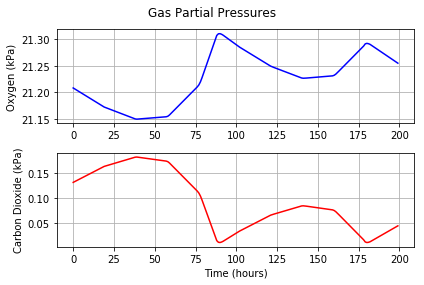

In [8]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(range(z), x1, 'b')
#plt.title('Gas Partial Pressures')
plt.grid(True)
plt.ylabel('Oxygen (kPa)')

plt.subplot(2, 1, 2)
plt.plot(range(z), x2, 'r')
plt.xlabel('Time (hours)')
plt.ylabel('Carbon Dioxide (kPa)')
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Gas Partial Pressures")
plt.show()
